# CNN simple model with one dense layer

In [1]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
import cv2
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
import glob
from sklearn.metrics import confusion_matrix

In [2]:
train_path = 'images/Augmentation/train'

# Create a mapping from string labels (emotions) to class numbers
emotion_to_class = {'anger': 1, 'fear': 2, 'happiness': 3, 'sadness': 4, 'surprise': 5, 'neutral': 6, 'disgust': 7}

# Initialize a set to store unique image labels
unique_labels = set()

# Initialize a list to store image data as tuples
train_image_data = []

# Loop through the subfolders
for folder_name in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder_name)
    if os.path.isdir(folder_path):
        image_files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Modify the extension pattern if needed

        for image_path in image_files:
            # Extract emotion label from the folder name
            emotion_label = folder_name.lower()  # Assuming folder name represents the emotion label

            # Convert the emotion label to class number using the mapping
            class_number = emotion_to_class.get(emotion_label, -1)  # -1 as a default value if the label is not in the mapping

            if class_number != -1:  # Consider only valid class numbers
                unique_labels.add(class_number)  # Add the class number to the set of unique labels

                # Read the image
                image = cv2.imread(image_path)

                # Store image and label as a tuple in the list
                train_image_data.append((image, class_number))
                
random.shuffle(train_image_data)
# Display the total number of collected images and the number of unique image labels
print("Total images collected:", len(train_image_data))
print("Number of unique image labels:", len(unique_labels))

Total images collected: 2912
Number of unique image labels: 7


In [3]:
test_path = 'images/Augmentation/test/'

# Initialize a list to store image data as tuples
test_image_data = []

# Loop through the subfolders
for folder_name in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder_name)
    if os.path.isdir(folder_path):
        image_files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Modify the extension pattern if needed

        for image_path in image_files:
            # Extract emotion label from the folder name
            emotion_label = folder_name.lower()  # Assuming folder name represents the emotion label

            # Convert the emotion label to class number using the mapping
            class_number = emotion_to_class.get(emotion_label, -1)  # -1 as a default value if the label is not in the mapping

            if class_number != -1:  # Consider only valid class numbers
                unique_labels.add(class_number)  # Add the class number to the set of unique labels

                # Read the image
                image = cv2.imread(image_path)

                # Store image and label as a tuple in the list
                test_image_data.append((image, class_number))
                
random.shuffle(test_image_data)
# Display the total number of collected images and the number of unique image labels
print("Total images collected:", len(test_image_data))
print("Number of unique image labels:", len(unique_labels))

Total images collected: 1120
Number of unique image labels: 7


In [4]:
print(unique_labels)

{1, 2, 3, 4, 5, 6, 7}


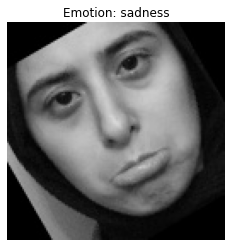

In [5]:
# Access an image and its corresponding emotion label
first_image, first_emotion = train_image_data[100]

# Display the image along with its emotion label
emotion_map = {1: 'anger', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral', 7: 'disgust'}
emotion_label = emotion_map.get(first_emotion, 'Unknown')  # Get emotion label based on the mapped class number

# Plot the image with the emotion label as the title
plt.imshow(first_image)
plt.title(f"Emotion: {emotion_label}")
plt.axis('off')  # Turn off axis labels
plt.show()

In [6]:
X_train = np.array([data[0] for data in train_image_data])
train_labels = np.array([data[1] for data in train_image_data])
train_labels_adjusted = train_labels - 1  # Subtract 1 from each label to start from 0
y_train = to_categorical(train_labels_adjusted, num_classes=7)

X_test = np.array([data[0] for data in test_image_data])
test_labels = np.array([data[1] for data in test_image_data])
test_labels_adjusted = test_labels - 1  # Subtract 1 from each label to start from 0
y_test = to_categorical(test_labels_adjusted, num_classes=7)

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.3, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization,GlobalAveragePooling2D # For building model layers


# model 3

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Assuming 7 emotions

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)             

In [8]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Reduce learning rate when a metric has stopped improving
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [9]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/10


91/91 [==============================] - 38s 213ms/step - loss: 48.3133 - accuracy: 0.6058 - val_loss: 4.6667 - val_accuracy: 0.2313
Epoch 2/10
91/91 [==============================] - 11s 120ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 6.3833 - val_accuracy: 0.1634
Epoch 3/10
91/91 [==============================] - 11s 125ms/step - loss: 4.3891e-04 - accuracy: 1.0000 - val_loss: 6.6638 - val_accuracy: 0.1920
Epoch 4/10
91/91 [==============================] - 12s 131ms/step - loss: 2.0208e-04 - accuracy: 1.0000 - val_loss: 6.8857 - val_accuracy: 0.1741
Epoch 5/10
91/91 [==============================] - 11s 122ms/step - loss: 1.1409e-04 - accuracy: 1.0000 - val_loss: 7.0313 - val_accuracy: 0.1839
Epoch 6/10
91/91 [==============================] - 10s 114ms/step - loss: 7.4818e-05 - accuracy: 1.0000 - val_loss: 7.2106 - val_accuracy: 0.1839
Epoch 7/10
91/91 [==============================] - 10s 112ms/step - loss: 5.3323e-05 - accuracy: 1.0000 - val_loss: 7.3253

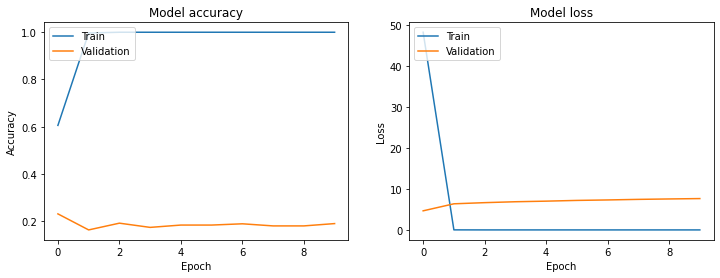

In [10]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

35/35 [==============================] - 1s 24ms/step


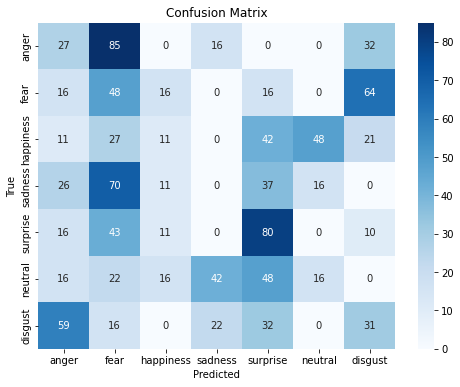

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions on the test data
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=emotion_to_class.keys(), yticklabels=emotion_to_class.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

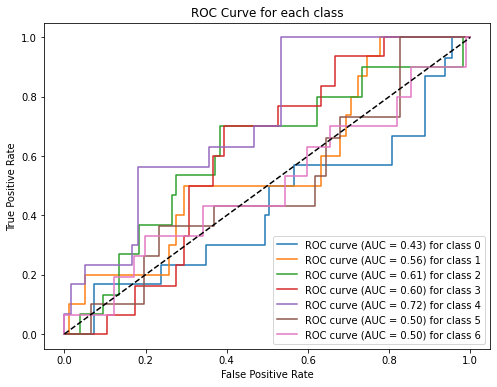

In [12]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(emotion_to_class)):
    fpr[i], tpr[i], _ = roc_curve(y_true_classes == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(emotion_to_class)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='lower right')
plt.show()

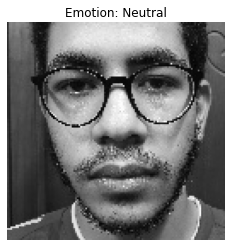

Input Data Shape: (1, 128, 128, 3)
1/1 [==============================] - 0s 323ms/step
Predicted Emotion: Disgust


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess a new image for testing
val_image_path = 'images/detected faces/validation detected faces for each emotion/preprocessed/neutral/555785.jpg_face.jpg'  # Replace with the path to your test image

# Read the image
val_image = cv2.imread(val_image_path)

# Resize the image to match the model's input shape (128x128)
val_image = cv2.resize(val_image, (128, 128))

# Plot the image
plt.imshow(cv2.cvtColor(val_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Emotion: Neutral")
plt.axis('off')  # Turn off axis labels
plt.show()

val_data = np.array(val_image)

# Expand dimensions to match the model's expected input shape (add batch dimension)
val_data = np.expand_dims(val_data, axis=0)

# Print the shape of the input data
print("Input Data Shape:", val_data.shape)


# Make predictions
predictions = model.predict(val_data)

# Convert predictions to class labels
predicted_class = np.argmax(predictions)

# Map the predicted class index to the corresponding emotion label
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
predicted_emotion = emotion_labels[predicted_class]

# Print the predicted emotion
print(f'Predicted Emotion: {predicted_emotion}')

